### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [48]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [50]:
def cat_gpa(gpa):
    if 0<= gpa <=2:
        return 'Low'
    elif 2 < gpa <= 3.5:
        return 'Medium'
    elif 3.5 < gpa <= 5:
        return 'High'
    else:
        return 'Unknown'
    
data['Profile'] = data['GPA'].apply(cat_gpa)

data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

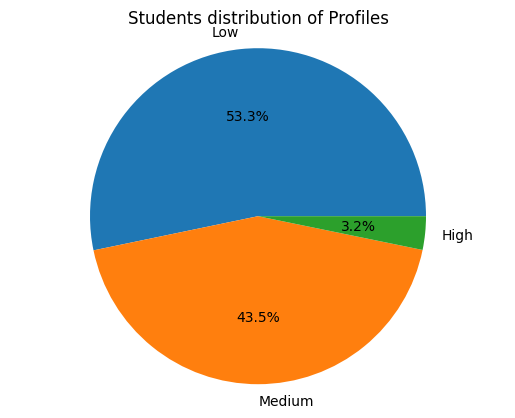

In [51]:
profile_counts = data['Profile'].value_counts()

plt.pie(profile_counts, labels = profile_counts.index, autopct='%1.1f%%')
plt.title('Students distribution of Profiles')
plt.axis('equal')
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [52]:
cat ={'Low': 0, 'Medium': 1, 'High':2}
data['Profile'] = data['Profile'].map(cat)
    
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [53]:
dataset = data.drop(columns = ['StudentID','Age','Gender','Ethnicity'])
X = dataset.drop(columns=['Profile'])
y = dataset['Profile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train.shape)

(1913, 11)


### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [55]:
model = Sequential()
model.add(Dense(64, input_dim = 11, activation = 'relu' ))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [56]:
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [57]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)  

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6781 - loss: 0.7740 - val_accuracy: 0.9426 - val_loss: 0.2476
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9425 - loss: 0.2175 - val_accuracy: 0.9530 - val_loss: 0.1471
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9440 - loss: 0.1528 - val_accuracy: 0.9530 - val_loss: 0.1010
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9679 - loss: 0.0971 - val_accuracy: 0.9739 - val_loss: 0.0795
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.9822 - loss: 0.0698 - val_accuracy: 0.9739 - val_loss: 0.0651
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9823 - loss: 0.0513 - val_accuracy: 0.9791 - val_loss: 0.0553
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.9828 - loss: 0.0516 - val_accuracy: 0.9817 - val_loss: 0.0500
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9875 - loss: 0.0445 - va

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

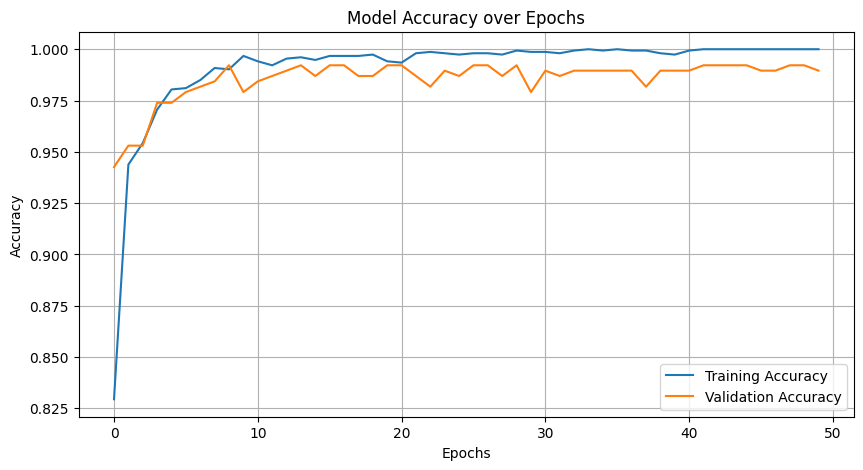

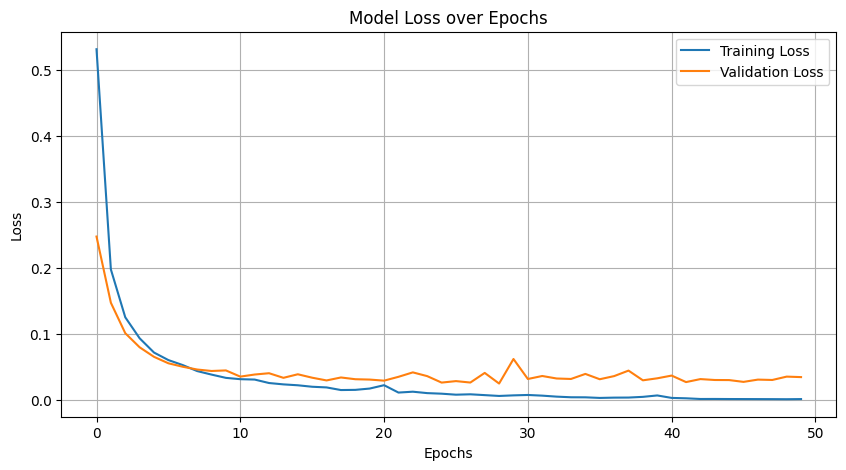

In [58]:
# Primer gráfico: Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Segundo gráfico: Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [59]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)

# Mostrar los resultados
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.9876 - loss: 0.1103   
Test Loss: 0.14272086322307587
Test Accuracy: 0.9812108278274536


### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [60]:
import numpy as np

# Hacer predicciones sobre X_test
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)
reverse_cat = {0: 'Low', 1: 'Medium', 2: 'High'}

predicted_labels = [reverse_cat[p] for p in predicted_classes]
actual_labels = [reverse_cat[a] for a in y_test]

# Imprimir los resultados (predicciones vs valores reales)
for pred, actual in zip(predicted_labels, actual_labels):
    print(f'Predicted: {pred}, Actual: {actual}')

# Evaluar el rendimiento del modelo
correct_predictions = sum(p == a for p, a in zip(predicted_labels, actual_labels))
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print(f'Accuracy on test set: {accuracy * 100:.2f}%')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Act

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [61]:
# Your code here
# Dataset Data Engineering
dataset2 = data.drop(columns=['Gender','Ethnicity','ParentalSupport','Music','StudentID'])
X2 = dataset2.drop(columns=['Profile'])
y2 = dataset2['Profile']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
print(X_train_scaled2.shape)

# Model Definition
model2 = Sequential()
model2.add(Dense(128, input_dim=10, activation='relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(3, activation = 'softmax'))

# Model Compile
model2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history2 = model2.fit(X_train_scaled2, y_train2, epochs=50, batch_size=10, validation_split=0.2)        

# Evaluar el modelo en los datos de prueba
loss2, accuracy2 = model2.evaluate(X_test_scaled2, y_test2)

# Mostrar los resultados
print(f"Test Loss (MSE): {loss2}")
print(f"Test Accuracy: {accuracy2}")

(1913, 10)
Epoch 1/50


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.5908 - val_accuracy: 0.9426 - val_loss: 0.1585
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9590 - loss: 0.1309 - val_accuracy: 0.9765 - val_loss: 0.0790
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9796 - loss: 0.0729 - val_accuracy: 0.9869 - val_loss: 0.0725
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9805 - loss: 0.0709 - val_accuracy: 0.9687 - val_loss: 0.0732
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9852 - loss: 0.0527 - val_accuracy: 0.9843 - val_loss: 0.0784
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.9909 - loss: 0.0383 - val_accuracy: 0.9922 - val_loss: 0.0276
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0359 - val_accuracy: 0.9869 - val_loss: 0.0498
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.9911 - loss: 0.0333 - val_accuracy: 0

### Cambios en el modelo 2:
Se agregó una capa extra al modelo, se eliminaron columnas diferentes al modelo 1.

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

In [62]:
# Your code here
# Dataset Data Engineering
dataset3 = data.drop(columns=['Ethnicity','Sports','Volunteering','StudentID'])
X3 = dataset3.drop(columns=['Profile'])
y3 = dataset3['Profile']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3)
X_test_scaled3 = scaler.transform(X_test3)
print(X_train_scaled3.shape)

# Model Definition
model3 = Sequential()
model3.add(Dense(128, input_dim=11, activation='relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))

# Model Compile
model3.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training
history3 = model3.fit(X_train_scaled3, y_train3, epochs=50, batch_size=10, validation_split=0.2)        

# Evaluar el modelo en los datos de prueba
loss3, accuracy3 = model3.evaluate(X_test_scaled3, y_test3)

# Mostrar los resultados
print(f"Test Loss (MSE): {loss3}")
print(f"Test Accuracy: {accuracy3}")

(1913, 11)
Epoch 1/50


c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4938 - val_accuracy: 0.9504 - val_loss: 0.1549
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.9617 - loss: 0.1156 - val_accuracy: 0.9713 - val_loss: 0.0992
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9642 - loss: 0.0918 - val_accuracy: 0.9608 - val_loss: 0.0870
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9676 - loss: 0.0886 - val_accuracy: 0.9687 - val_loss: 0.0754
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.9842 - loss: 0.0518 - val_accuracy: 0.9739 - val_loss: 0.0624
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9873 - loss: 0.0469 - val_accuracy: 0.9713 - val_loss: 0.0650
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9829 - loss: 0.0390 - val_accuracy: 0.9843 - val_loss: 0.0532
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9877 - loss: 0.0531 - val_accuracy:

### Cambios en el modelo 3
Se cambiaron las columnas que se quitaron y se cambio el optimizador por RMSprop

### Resultados

In [63]:
resultados = {
    'model':['model1', 'model2', 'model3'],
    'loss' : [loss, loss2, loss3],
    'accuracy' : [accuracy, accuracy2, accuracy3]
}
resultados = pd.DataFrame(resultados)
print(resultados)

    model      loss  accuracy
0  model1  0.142721  0.981211
1  model2  0.093363  0.983299
2  model3  0.128186  0.981211


### Predicciones

In [64]:
import numpy as np

# Obtener las predicciones de clase (en lugar de probabilidades)
predictions = np.argmax(model.predict(X_test_scaled), axis=1)
predictions2 = np.argmax(model2.predict(X_test_scaled2), axis=1)
predictions3 = np.argmax(model3.predict(X_test_scaled3), axis=1)

# Obtener las primeras 5 predicciones de cada modelo
preds_model1 = predictions[:5]
preds_model2 = predictions2[:5]
preds_model3 = predictions3[:5]
real_values = y_test.iloc[:5]

# Crear un DataFrame con las predicciones y los valores reales
tabla_predicciones = pd.DataFrame({
    'Predicción Modelo 1': preds_model1,  # Las predicciones ahora son clases, no probabilidades
    'Predicción Modelo 2': preds_model2,
    'Predicción Modelo 3': preds_model3,
    'Valor Real': real_values.values
})

# Mostrar la tabla con las primeras 5 predicciones
print(tabla_predicciones)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
   Predicción Modelo 1  Predicción Modelo 2  Predicción Modelo 3  Valor Real
0                    0                    0                    0           0
1                    1                    1                    1           1
2                    1                    1                    1           1
3                    2                    2                    2           2
4                    0                    0                    0           0


Dados los resultados de los modelos, se pudo llegar a la conclusión de que los 3 modelos son muy buenos pero el modelo numero 2 tiene un porcentaje de accuracy un poco mas alto al resto. Otra conclusión a la que se llegó fue que al estar realizando pruebas y tratar con diferentes funciones de prueba, a diferencia de la actividad pasada, la función de perdida 'mse' no es buena para problemas de clasificación, por eso se utiliza 'sparse_categorical_crossentropy'.